In [1]:
import os

import numpy as np
import matplotlib.image as mp
import matplotlib.pyplot as plt

from utils.config import DATA_DIR

In [2]:
img = mp.imread(os.path.join(DATA_DIR, 'map1.jpg')).copy()[3:-3, 3:-3, :]
img_ = mp.imread(os.path.join(DATA_DIR, 'map.jpg')).copy()[3:-3, 3:-3, :3]

# for i in range(115, 117):
#     for j in range(250, 253):
#         img[i, j] = np.array([180, 42, 66])
#
# plt.figure(figsize=(980/72, 725/72))
# plt.imshow(img)
# plt.xticks([])
# plt.yticks([])
# plt.savefig(os.path.join(DATA_DIR, 'map_.png'))

In [30]:
def conv_(layer, size=20, alpha=.1, gamma=.5):
    pos_kernal = np.array([[1 / ((i - size) ** 2 + (j - size) ** 2 + 1) ** alpha
                            for i in range(2 * size + 1)] for j in range(2 * size + 1)])
    soft_x = lambda x, kernal: x * np.exp(x * gamma) / np.sum(np.exp(x * gamma)) * kernal
    new_layer = np.array([[np.sum(soft_x(layer[max(0, i - size): min(layer.shape[0], i + size + 1),
                                         max(0, j - size): min(layer.shape[1], j + size + 1)],
                                         pos_kernal[max(0, size - i):min(layer.shape[0] + size - i, 2 * size + 1),
                                         max(0, size - j): min(layer.shape[1] + size - j, 2 * size + 1)]))
                           for j in range(layer.shape[1])] for i in range(layer.shape[0])])
    return new_layer / np.max(new_layer) * 5.

def conv(fig, size=10, alpha=.1, gamma=.5):
    return np.stack([conv_(fig[:, :, _], size=size, alpha=alpha, gamma=gamma) for _ in range(3)], axis=-1)

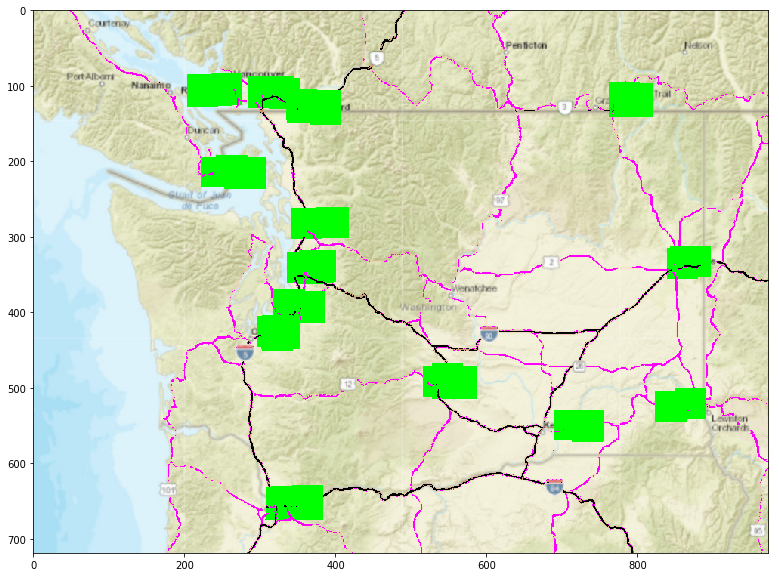

In [15]:
output = img_.copy()
plt.figure(figsize=(974/72, 719/72))
road = np.zeros(output.shape[:2])
pop = np.zeros(output.shape[:2])

for i in range(719):
    for j in range(974):
        r, g, b = img_[i, j]
        # Main roads
        if (200 < r < 225) & (150 < g < 185) & (120 < b < 160):
            output[i, j] = (0, 0, 0)
            road[i, j] = 5
            pop[i, j] = 4
        elif (235 < r < 250) & (190 < g < 230) & (150 < b < 200):
            output[i, j] = (255, 0, 255)
            road[i, j] = 3
            pop[i, j] = 2.5
        elif (220 < r < 230) & (190 < g < 210) & (150 < b < 170):
            output[i, j] = (255, 0, 255)
            road[i, j] = 3
            pop[i, j] = 2.5
        if i > 100 and j > 220:
            if (r < 75) & (g < 75) & (b < 75):
                pop[i - 20: i + 21, j - 20: j + 21] = \
                    5 * np.array([[1 / ((i - 20) ** 2 + (j - 20) ** 2 + 1) ** .05
                                   for i in range(2 * 20 + 1)] for j in range(2 * 20 + 1)])
                output[i - 20: i + 21, j - 20: j + 21] = (0, 255, 0)

plt.imshow(output)

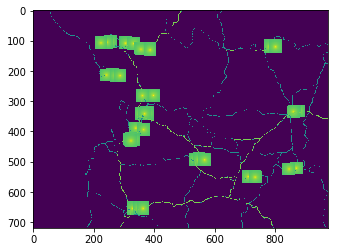

In [16]:
plt.imshow(pop)

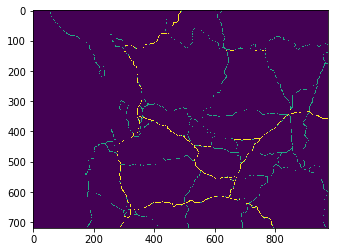

In [18]:
plt.imshow(road)

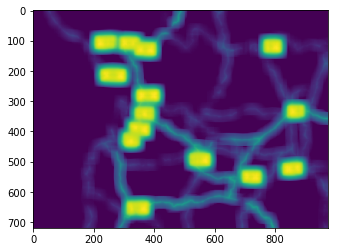

In [31]:
pop_ = conv_(pop, size=20, alpha=.3, gamma=.5)
plt.imshow(pop_)

In [ ]:
# Run 2-3 times
pop_ = conv_(pop_, size=40, alpha=.3, gamma=.5)
plt.imshow(pop_)

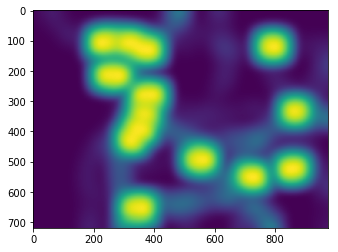

In [37]:
plt.imshow(pop_)

In [34]:
np.max(pop_)

5.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


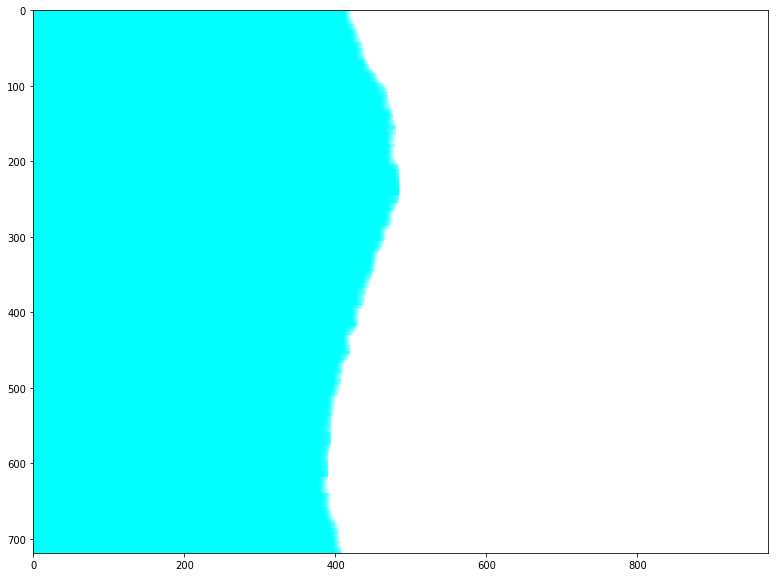

In [38]:
output = img.copy()
is_set = np.zeros(img.shape[:2])
water = np.zeros(img.shape[:2])
ocean = np.zeros(img.shape[:2])

for i in range(719):
    for j in range(974):
        r, g, b = img[i, j]
        # Water
        if (165 < r < 240) & (190 < g < 245) & (215 < b < 255):
            output[i, j] = (0, 151, 238)
            is_set[i, j] = 1
            water[i, j] = 5
            ocean[i, j] = 1
        # shanji
        elif (190 < r < 210) & (30 < g < 40) & (40 < b < 55):
            if j < 973:
                r, g, b = img[i, j + 1]
                if not (190 < r < 210) & (30 < g < 40) & (40 < b < 55):
                    for k in range(j + 5):
                        if is_set[i, k] == 0:
                            output[i, k] = (0, 168, 222)
                            is_set[i, k] = 1
                            water[i, k] = 4.5
                    for k in range(j + 5, 974):
                        if is_set[i, k] == 0:
                            output[i, k] = (191, 191, 191)
                            is_set[i, k] = 1
                    continue

plt.figure(figsize=(974/72, 719/72))
plt.imshow(conv(output / 255.))

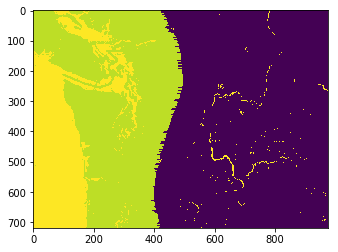

In [39]:
plt.imshow(water)

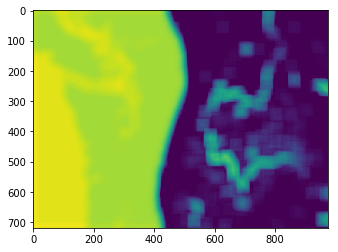

In [40]:
water_ = conv_(water, size=20, alpha=.1, gamma=.5)
plt.imshow(water_)

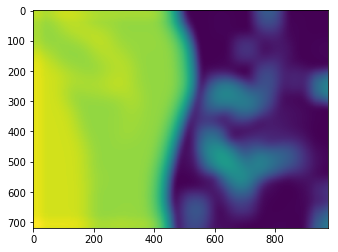

In [42]:
# Run 2-3 times
water_ = conv_(water_, size=40, alpha=.1, gamma=.5)
plt.imshow(water_)

In [134]:
def mask(value, lim, background=np.array([0., 0., 0.])):
    output = np.zeros(list(value.shape) + [3])
    k = (background - lim) / np.max(value)
    for i in range(value.shape[0]):
        for j in range(value.shape[1]):
            output[i, j, :] = background - value[i, j] * k
    return output / 255.

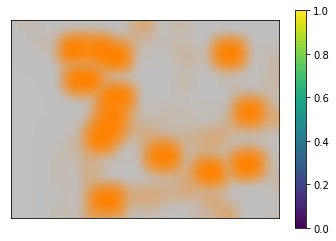

In [135]:
plt.imshow(mask(pop_, np.array([255, 130, 0]), background=np.ones(3) * 191.))
plt.xticks([])
plt.yticks([])
plt.colorbar()

([], <a list of 0 Text yticklabel objects>)

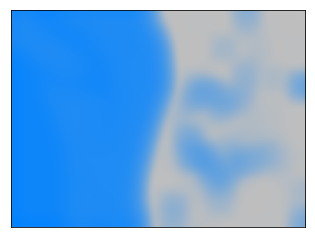

In [73]:
plt.imshow(mask(water_, np.array([0, 130, 255]), background=np.ones(3) * 191.))
plt.xticks([])
plt.yticks([])

In [141]:
np.array([[(i+1) / 100. for i in range(100)] for _ in range(100)]).shape

(100, 100)

In [142]:
sub_1 = np.ones([100, 100]) * np.array([np.array([1] * 100) * (i+1) / 100. for i in range(100)])
sub_1 = mask(sub_1, np.array([255, 130, 0]), background=np.ones(3) * 191.)
sub_2 = np.ones([100, 100]) * np.array([[(i+1) / 100. for i in range(100)] for _ in range(100)])
sub_2 = mask(sub_2, np.array([0, 130, 255]), background=np.ones(3) * 191.)

In [143]:
mask_pop = mask(pop_, np.array([255, 130, 0]), background=np.ones(3) * 191.)
mask_water = mask(water_, np.array([0, 130, 255]), background=np.ones(3) * 191.)

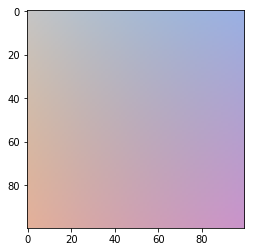

In [145]:
def merge(*layers, background, l=3):
    return np.sum([layer * np.exp(np.abs(layer - background) * l) for layer in layers], axis=0) / \
           np.sum([np.exp(layer * l) for layer in layers], axis=0) + background

plt.imshow(merge(mask_pop, mask_water, background=np.ones_like(mask_pop) * 40. / 255., l=1.2))

In [114]:
def high_contrast(image, l=3):
    return image * np.exp(image * l) / np.sum(np.exp(image * l), axis=-1).reshape(list(image.shape[:2]) + [1])

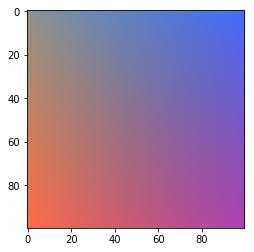

In [146]:
sub_ = merge(sub_1, sub_2, background=np.ones_like(sub_1) * 40. / 255., l=1.2)
sub_ = high_contrast(sub_)
plt.imshow(sub_ / np.max(sub_))

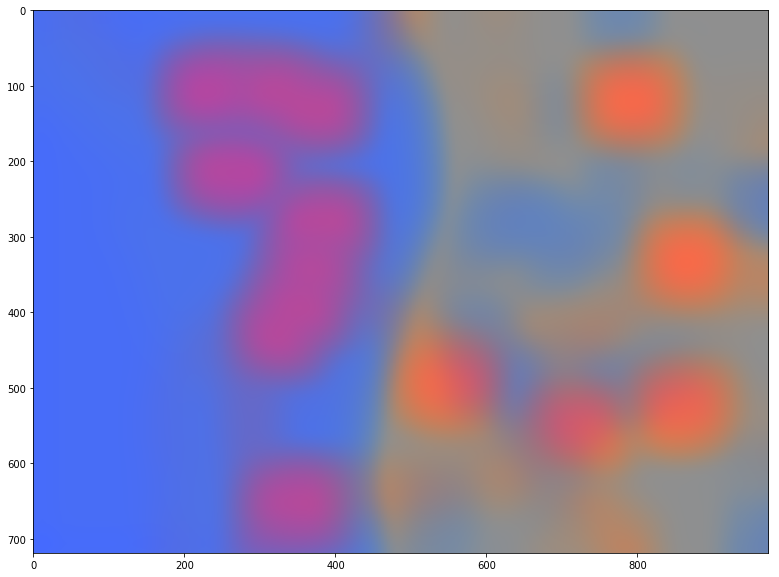

In [147]:
mask_ = merge(mask_pop, mask_water, background=np.ones_like(mask_pop) * 40. / 255., l=1.2)
mask_ = high_contrast(mask_)
plt.figure(figsize=(974/72, 719/72))
plt.imshow(mask_ / np.max(mask_))

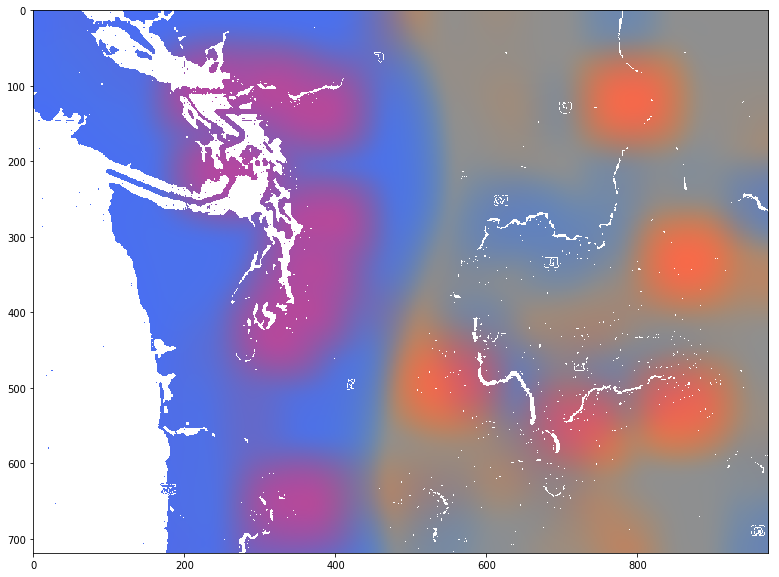

In [154]:
plt.figure(figsize=(974/72, 719/72))
plt.imshow(np.min([mask_ / np.max(mask_)  + ocean.reshape(list(mask_.shape[:2]) + [1]), np.ones_like(mask_)], axis=0))

In [ ]:
plt.imshow((mask_water + mask_pop) / 2)

In [ ]:
merged_layer = merge(mask_pop, mask_water, l=1.5)

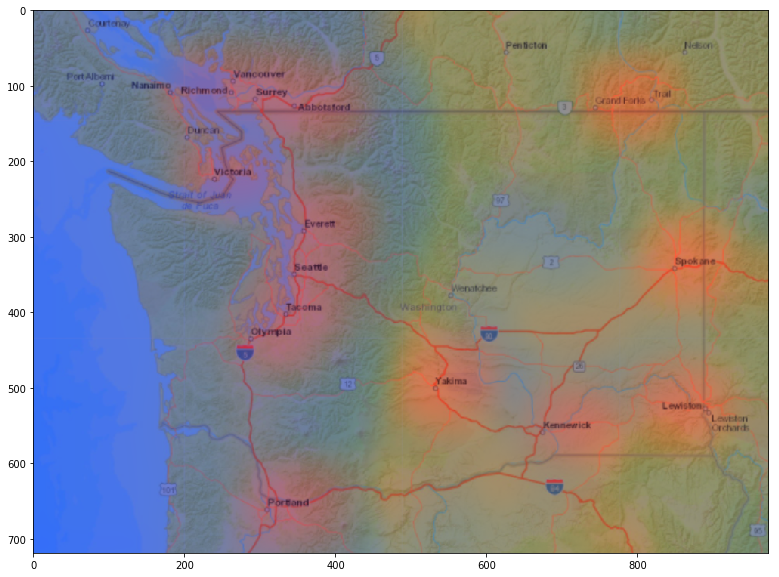

In [120]:
plt.figure(figsize=(974/72, 719/72))
plt.imshow(high_contrast((img_ / 255. + mask_) / 2) / np.max(high_contrast((img_ / 255. + mask_) / 2)))

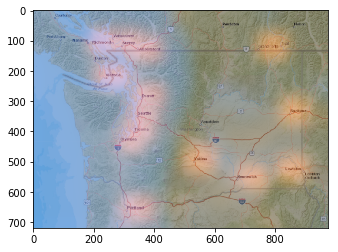

In [60]:
plt.imshow(merge(merged_layer, img_ / 255., l=0.5))

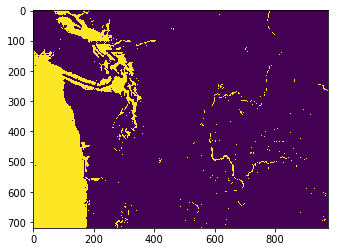

In [67]:
plt.imshow(ocean)

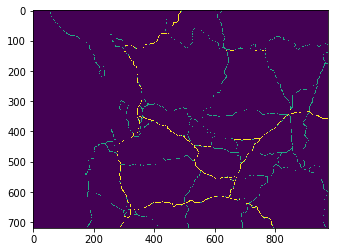

In [51]:
plt.imshow(road)

In [65]:
import cv2
normed = cv2.normalize(merge(merged_layer, img_ / 255., l=0.5), dst=None,alpha=950,beta=90)

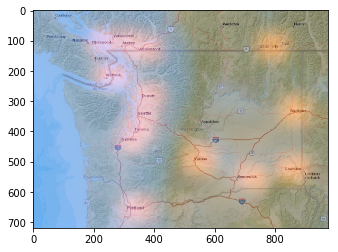

In [66]:
plt.imshow(normed)

In [4]:
k1 = (46.4231 - 49.1663) / (532 - 111.5)
b1 = 49.1663 - k1 * 111.5
lat = lambda x: k1 * x + b1

k2 = (-117.0404 - -124.6120) / (891 - 111)
b2 = -124.6120 - k2 * 111
lon = lambda x: k2 * x + b2

coord = lambda x, y: (lat(x), lon(y))

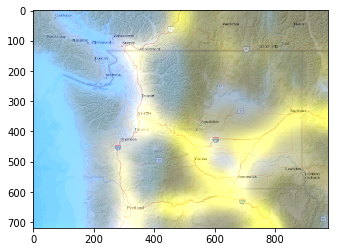

In [104]:
plt.imshow(np.min([(merge(mask_road, mask_water) + img_ / 255) / 1.5,
                   np.ones(img.shape)], axis=0))

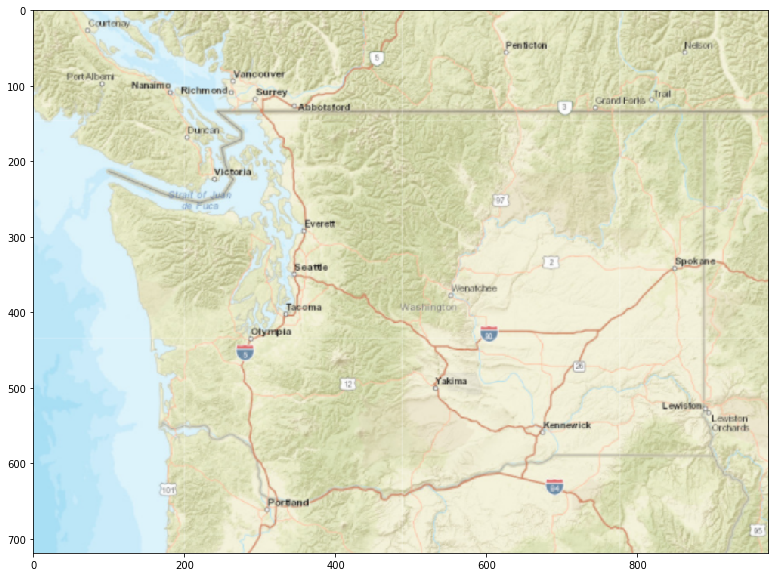

In [102]:
plt.figure(figsize=(974/72, 719/72))
plt.imshow(img_/255)
plt.savefig(os.path.join(DATA_DIR, 'map_res.png'))